<header style="width:100%;position:relative">
  <div style="width:80%;float:right;">
    <h1>Challenge Loan Approval Prediction in Pennsylvania</h1>
    <h3>Visualización de los datos</h3>
    <h5>Grupo 2</h5>
  </div>
        <img style="width:15%;" src="./images/logo.jpg" alt="UPM" />
</header>

# Índice

1. [Importar librerias](#1.-Importar-librerias)  
2. [Analizar la distribución](#2.-Analizar-la-distribucion)  
3. [Scatterplot](#3.-Scatterplot)  
4. [Relación entre datos](#4.-Relacion-entre-datos)  

# 1. Importar librerias

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

df = pd.read_csv('formated/train_exportado.csv')

# 2. Analizar la distribución

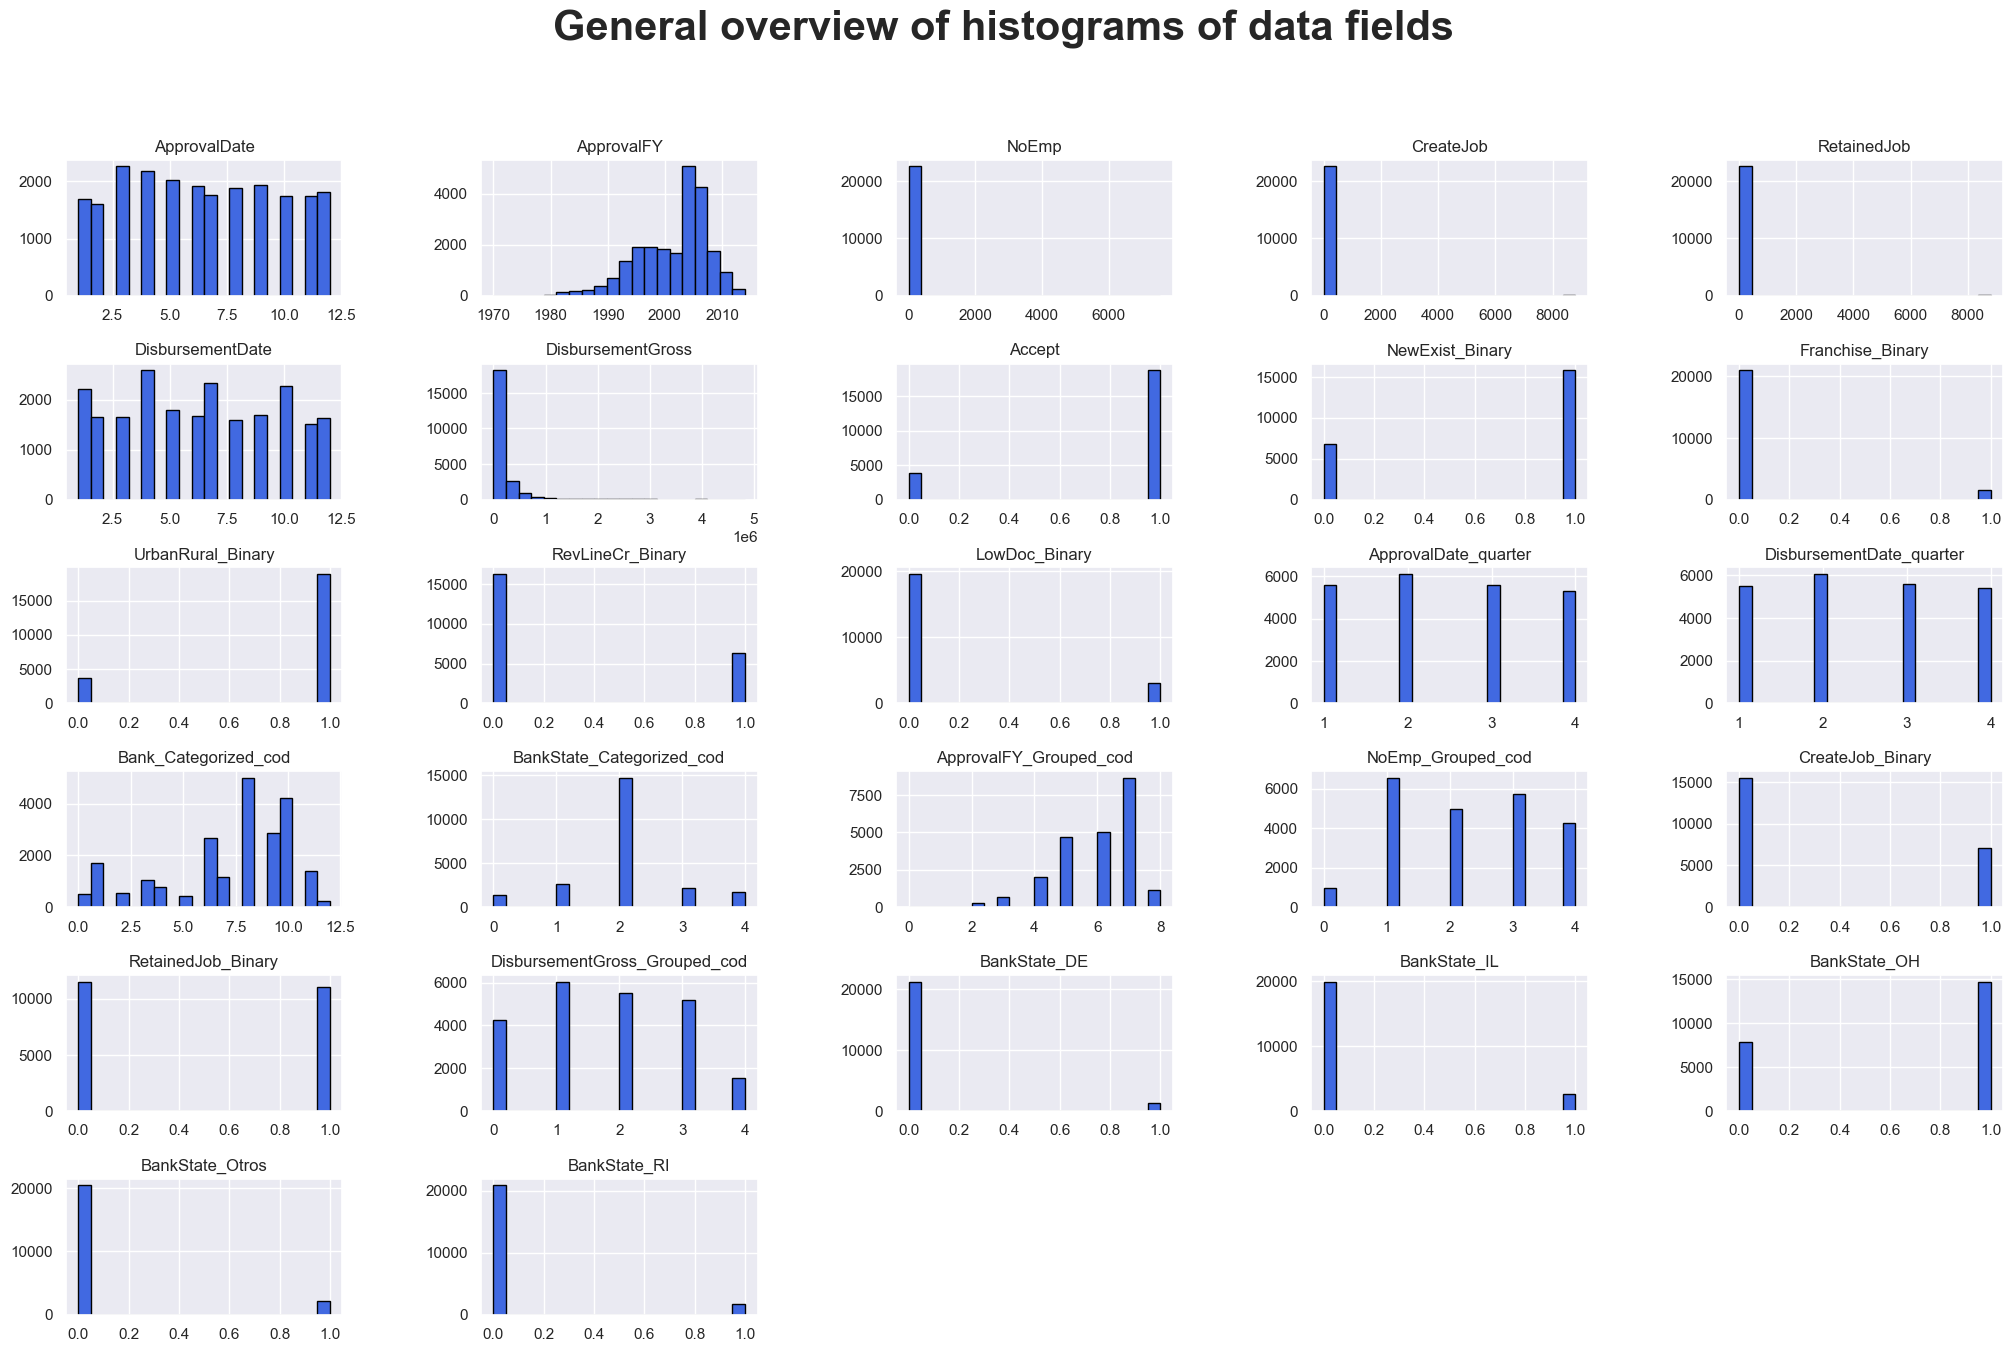

In [2]:
df.hist(figsize=(25, 15), bins=20, color="royalblue", edgecolor="black")
plt.suptitle("General overview of histograms of data fields", fontsize=30, fontweight="bold")
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
plt.show()

Varias distribuciones, como «DisbursementGross» y «ApprovalFY», muestran asimetría, lo que indica que la mayoría de los valores se concentran en el extremo inferior y que hay unos pocos valores extremadamente altos. Las variables binarias, como UrbanRural_Binary, RevLineCr_Binary y LowDoc_Binary, muestran un claro predominio de una categoría sobre otra, lo que sugiere distribuciones desequilibradas. «NoEmp» y «CreateJob» presentan distribuciones muy dispersas, en las que la mayoría de los valores se concentran en los valores más bajos, pero con valores atípicos en los valores más altos. Las variables categóricas agrupadas, como «ApprovalFY_Grouped_cod» y «DisbursementGross_Grouped_cod», muestran una distribución más homogénea entre categorías, pero con ciertos intervalos más poblados que otros. Algunas características, como «Bank_Categorized_cod», revelan una distribución multimodal, lo que sugiere la existencia de distintos subgrupos dentro de los datos.

# 3. Scatterplot

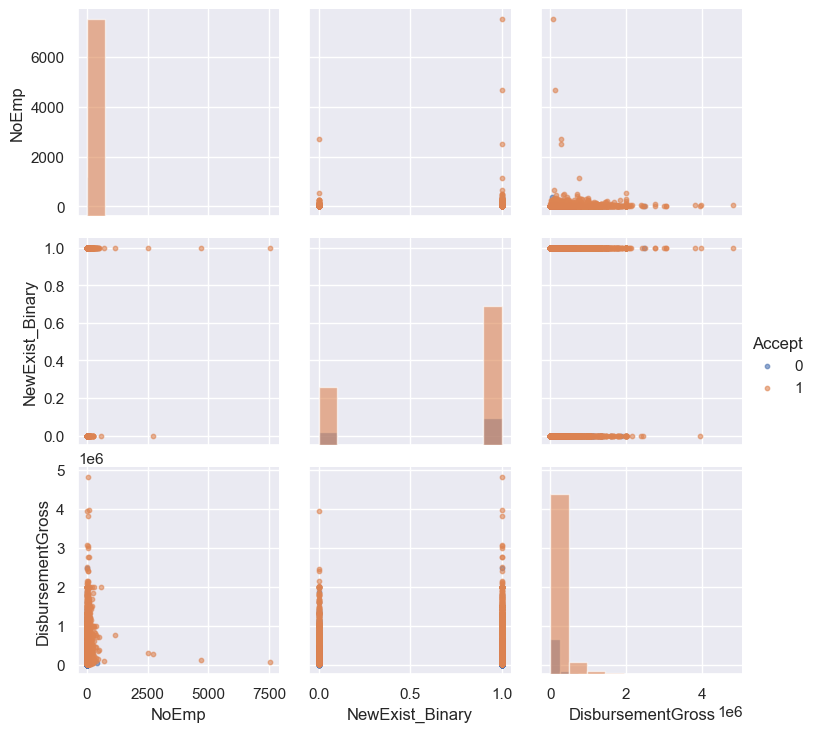

In [4]:
df_sorted = df.sort_values(by="Accept", ascending=True)
g = sns.PairGrid(df_sorted, hue="Accept", vars=['NoEmp', 'NewExist_Binary', 'DisbursementGross'])
g.map_diag(plt.hist, alpha=0.6) 
g.map_offdiag(plt.scatter, alpha=0.6, s=10)  
g.add_legend()
plt.show()

A simple vista, no se aprecian correlaciones lineales fuertes en este conjunto de datos.
La tendencia principal es que un mayor número de empleos (NoEmp) está ligeramente relacionado con un mayor desembolso de préstamos (DisbursementGross) y también con un business que no es nuevo (NewExist_Binary).
La aceptación parece bastante heterogénea en todas las características, lo que indica que otros factores invisibles pueden desempeñar un papel más importante en la concesión de los préstamos.

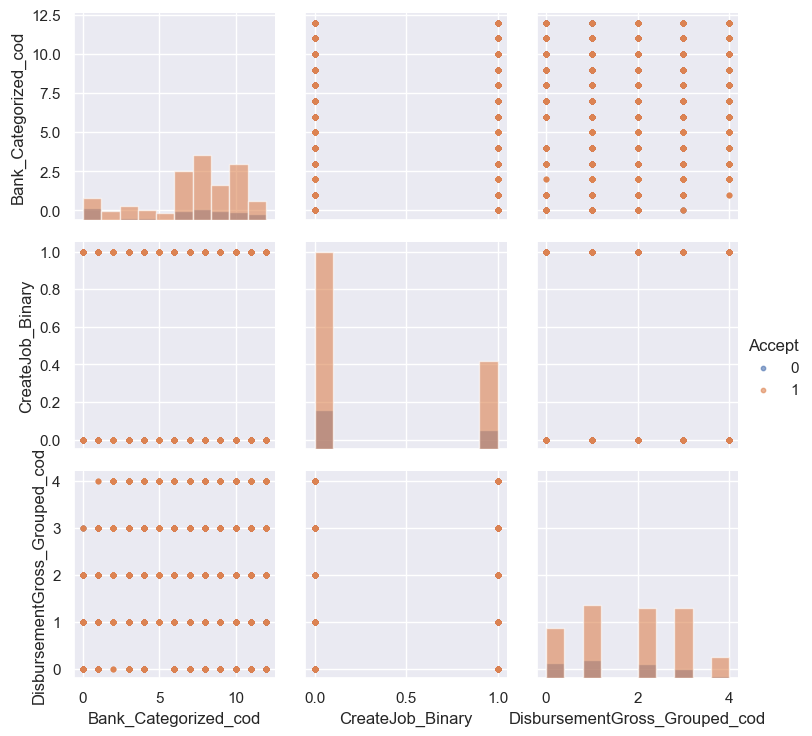

In [5]:
df_sorted = df.sort_values(by="Accept", ascending=True)
g = sns.PairGrid(df_sorted, hue="Accept", vars=['Bank_Categorized_cod', 'CreateJob_Binary', 'DisbursementGross_Grouped_cod'])
g.map_diag(plt.hist, alpha=0.6) 
g.map_offdiag(plt.scatter, alpha=0.6, s=10)  
g.add_legend()
plt.show()

No se aprecian correlaciones lineales en este conjunto de datos.

# 4. Relacion entre datos

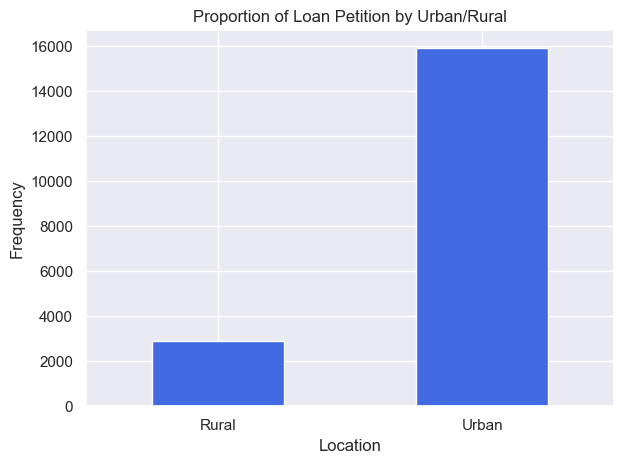

In [17]:
ax = (df.query('Accept ==1')
        .groupby(['UrbanRural_Binary'])
        .size()
     ).plot(kind='bar', color=['royalblue'])

ax.set_ylabel("Frequency")
ax.set_title("Proportion of Loan Petition by Urban/Rural")
ax.set_xlabel("Location")
ax.set_xticklabels(['Rural', 'Urban'], rotation=0)

plt.tight_layout()
plt.show()

Podemos ver que hay mucho más solicitudes de préstamo en las zonas urbanas que en las rurales.

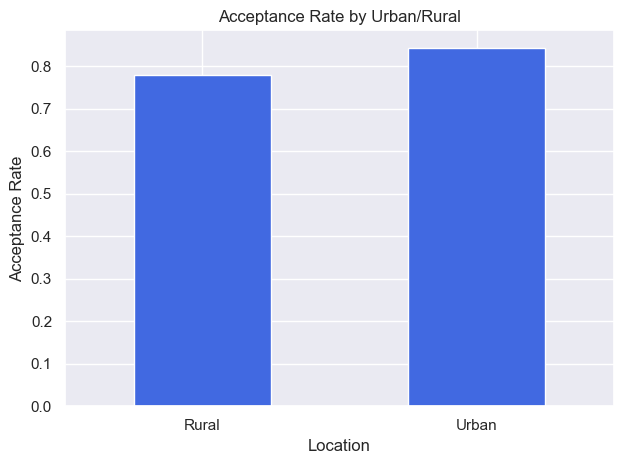

In [18]:
ax = (
    df.groupby('UrbanRural_Binary')['Accept']
      .mean()
      .plot(kind='bar', color='royalblue')
)
ax.set_ylabel("Acceptance Rate")
ax.set_title("Acceptance Rate by Urban/Rural")
ax.set_xlabel("Location")
ax.set_xticklabels(['Rural', 'Urban'], rotation=0)

plt.tight_layout()
plt.show()

Si miramos con las proporciones de solicitudes, veemos que hay solo un poco más de solicitudes de préstamo aceptadas en las zonas urbanas que en las rurales.

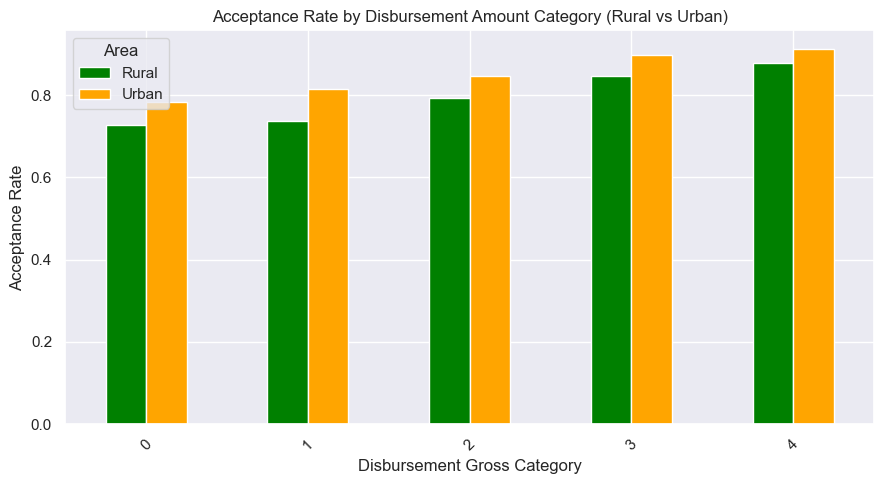

In [50]:
accept_rate = (
    df.groupby(['DisbursementGross_Grouped_cod', 'UrbanRural_Binary'])['Accept']
    .mean()
    .unstack()  
)

accept_rate.columns = ['Rural', 'Urban']

ax = accept_rate.plot(kind='bar', color=['green', 'orange'], figsize=(9, 5))

ax.set_title("Acceptance Rate by Disbursement Amount Category (Rural vs Urban)")
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("Disbursement Gross Category")
ax.legend(title="Area")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ahora analizamos la relación entre "Accept" y "DisbursementGross"

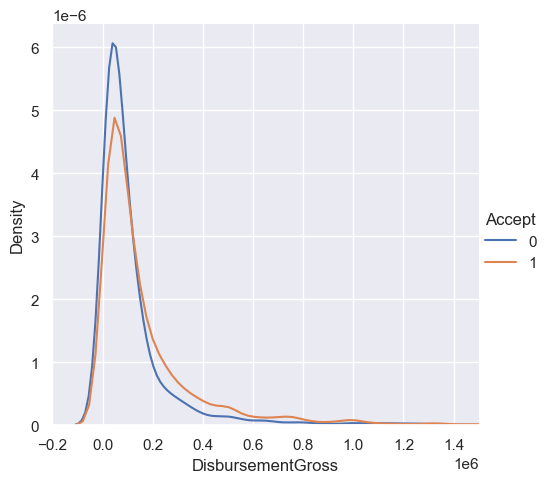

In [8]:
g = sns.FacetGrid(df, hue="Accept", height=5)
g.map(sns.kdeplot, "DisbursementGross")
plt.xlim(-0.2e6, 1.5*1e6)
g.add_legend()

plt.show()

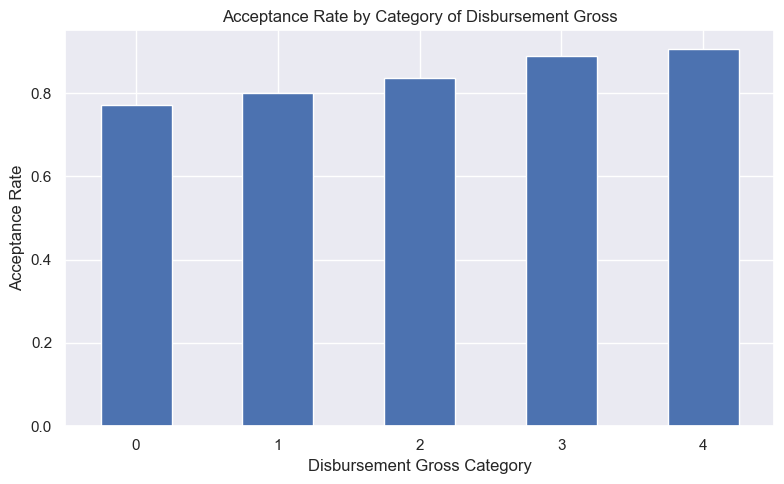

In [65]:
accept_rate = (
    df.groupby(['DisbursementGross_Grouped_cod'])['Accept']
    .mean()
)

ax = accept_rate.plot(kind='bar', figsize=(8, 5))

ax.set_title("Acceptance Rate by Category of Disbursement Gross")
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("Disbursement Gross Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

No observamos diferencias significativas. A medida que el valor de 'DisbursementGross' aumenta y se mueve a una categoría superior, la probabilidad de aceptación incrementa ligeramente.
Ahora analizamos la relación entre "Accept" y "NoEmp"

(-100.0, 100.0)

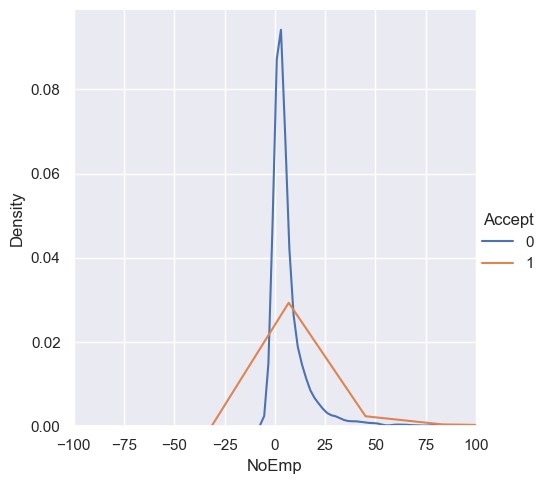

In [9]:
sns.FacetGrid(df, hue="Accept", height=5).map(sns.kdeplot, "NoEmp").add_legend()
plt.xlim(-100, 100)

Las curvas para Accept = 0 y Accept = 1 son muy diferentes y esto sugiere que el estado de aceptación esta influenciada por la variable "NoEmp".

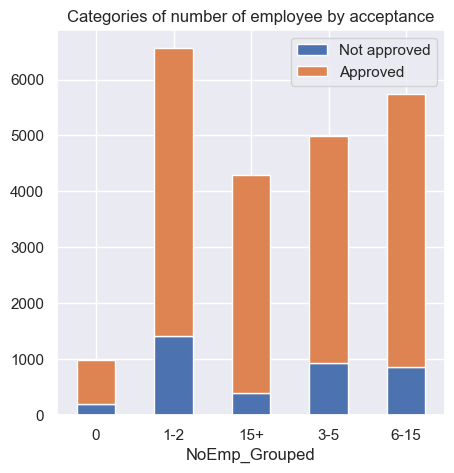

In [10]:
df.groupby(['NoEmp_Grouped', 'Accept']).size().unstack(['Accept']).plot(kind='bar', stacked=True,rot=0, subplots=False, figsize=(5,5))
a_labels = ['Not approved', 'Approved']
plt.legend(labels=a_labels)
plt.title('Categories of number of employee by acceptance')
plt.show()

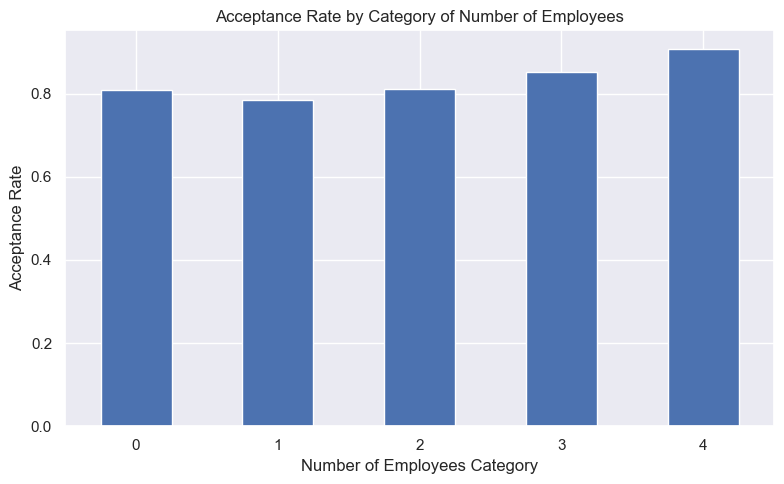

In [64]:
accept_rate = (
    df.groupby(['NoEmp_Grouped_cod'])['Accept']
    .mean()
)

ax = accept_rate.plot(kind='bar', figsize=(8, 5))

ax.set_title("Acceptance Rate by Category of Number of Employees")
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("Number of Employees Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Parece que la probabilidad de que le aprueben un préstamo aumenta con el número de empleados.

Ahora analizamos la relación entre "Accept" y "ApprovalFY"

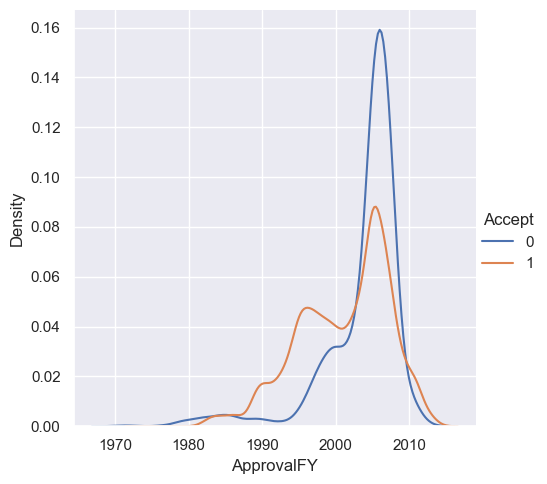

In [75]:
sns.FacetGrid(df, hue="Accept", height=5).map(sns.kdeplot, "ApprovalFY").add_legend()
plt.show()

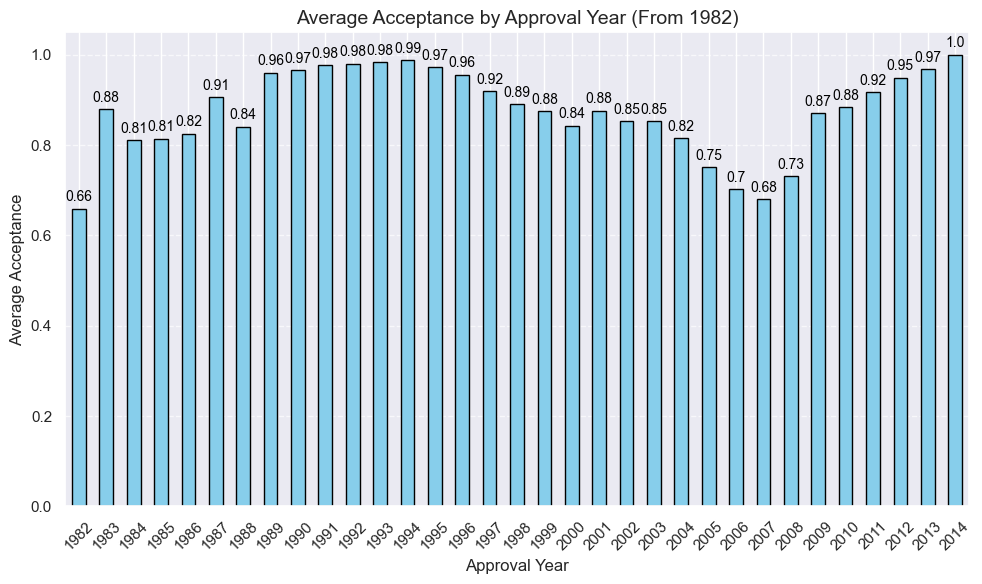

In [19]:
ax = df[df['ApprovalFY'] >= 1982].groupby('ApprovalFY').Accept.mean().plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

for i, v in enumerate(df[df['ApprovalFY'] >= 1982].groupby('ApprovalFY').Accept.mean()):
    ax.text(i, v + 0.01, round(v, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average Acceptance by Approval Year (From 1982)', fontsize=14)
plt.xlabel('Approval Year', fontsize=12)
plt.ylabel('Average Acceptance', fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Los años 2005 a 2008 estuvieron marcados por una combinación de factores económicos negativos, como la crisis de las hipotecas de alto riesgo, la subida de los tipos de interés y el endurecimiento de las políticas crediticias en respuesta a la incertidumbre económica. Estos factores contribuyeron a una caída significativa de la contratación de préstamos durante este periodo.

Ahora analizamos la relación entre "Accept" y "CreateJob"

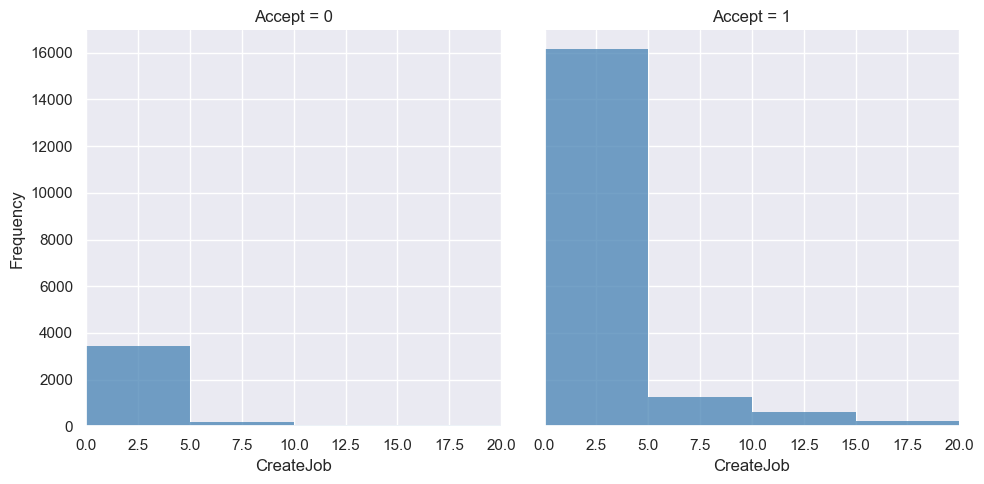

In [20]:
g = sns.FacetGrid(df, col='Accept', height=5, col_wrap=2)
g.map(sns.histplot, "CreateJob", color="steelblue", bins=range(0, int(df['CreateJob'].max()) + 5, 5), kde=False)
g.set(xlim=(0, 20))

g.set_axis_labels('CreateJob', 'Frequency')

plt.tight_layout()
plt.show()

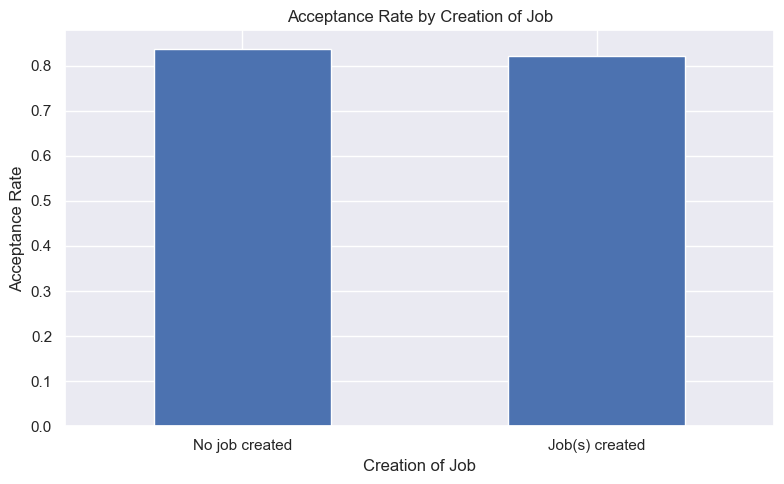

In [21]:
accept_rate = (
    df.groupby(['CreateJob_Binary'])['Accept']
    .mean()
)

ax = accept_rate.plot(kind='bar', figsize=(8, 5))

ax.set_title("Acceptance Rate by Creation of Job")
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("Creation of Job")
ax.set_xticklabels(['No job created', 'Job(s) created'], rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

No hay diferencias.

Ahora veremos si un estado recibe más aceptaciones que los demás.

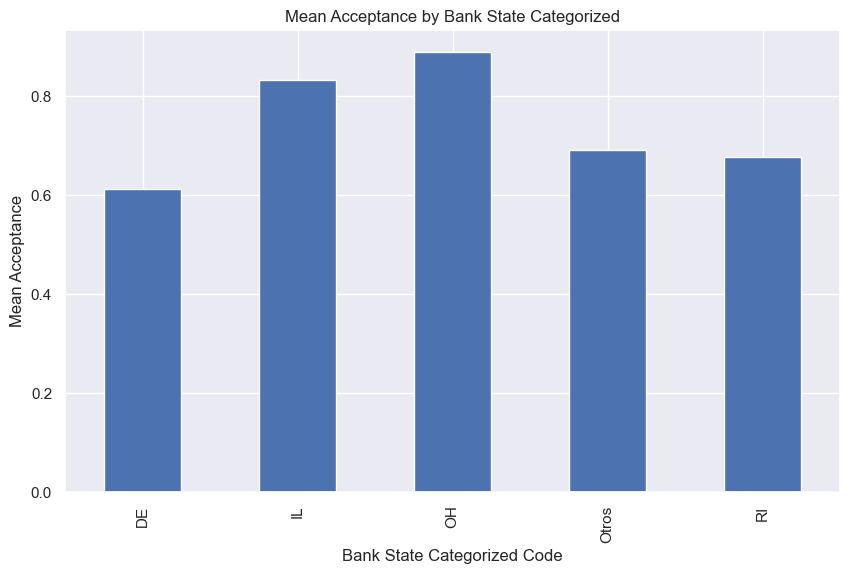

In [22]:
ax = df.groupby('BankState_Categorized_cod').Accept.mean().plot(kind='bar', figsize=(10, 6))

state_mapping = {0: 'DE', 1: 'IL', 2: 'OH', 3: 'Otros', 4: 'RI'}
ax.set_xticks(range(5)) 
ax.set_xticklabels([state_mapping[i] for i in range(5)])

plt.title('Mean Acceptance by Bank State Categorized')
plt.xlabel('Bank State Categorized Code')
plt.ylabel('Mean Acceptance')

# Show the plot
plt.show()

Podemos ver que en los estados de Illinois y Ohio, hay más probabilidad de que se acepte que en los otros estados.

Ahora veremos si un banco acepta más solicitudes que los demás.

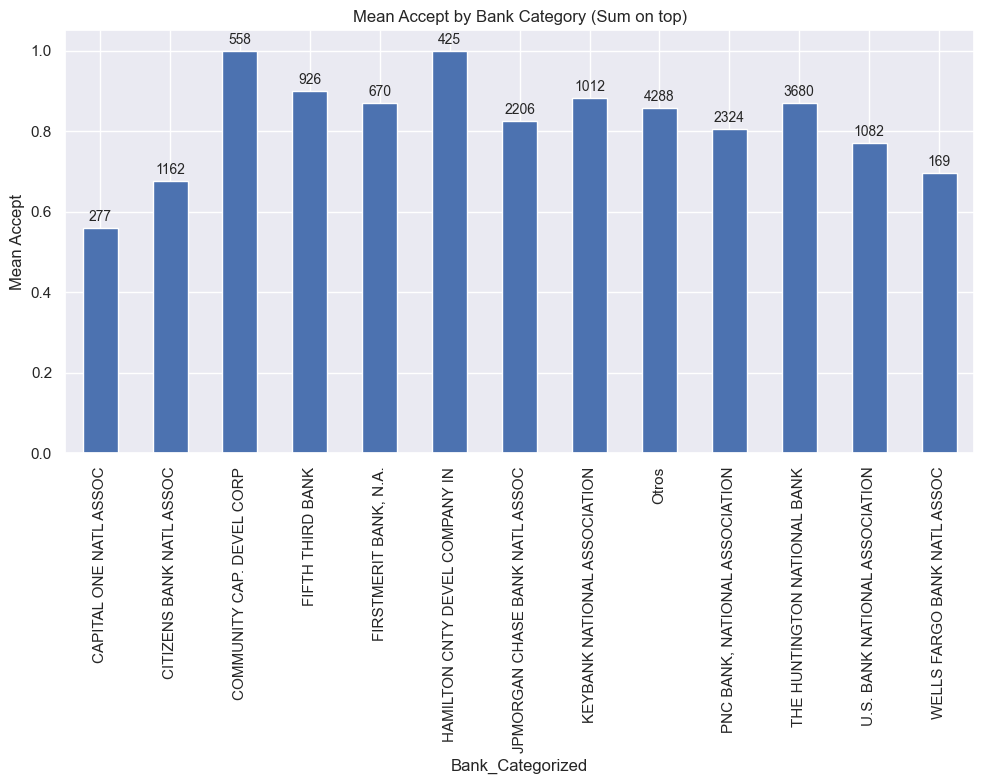

In [23]:
grouped = df.groupby('Bank_Categorized')['Accept']
means = grouped.mean()
sums = grouped.sum()

ax = means.plot(kind='bar', figsize=(10, 8))

for i, (sum_val) in enumerate(sums):
    ax.text(i, means[i] + 0.01, f'{sum_val:.0f}', ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Mean Accept')
ax.set_title('Mean Accept by Bank Category (Sum on top)')
plt.tight_layout()
plt.show()

Se observa que hay dos bancos con un alto número de solicitudes de préstamo que aprueban el 100% de ellas. Por otro lado, el banco que menos aprueba es CAPITAL ONE.

Veamos ahora si ser franquiciado marca alguna diferencia.

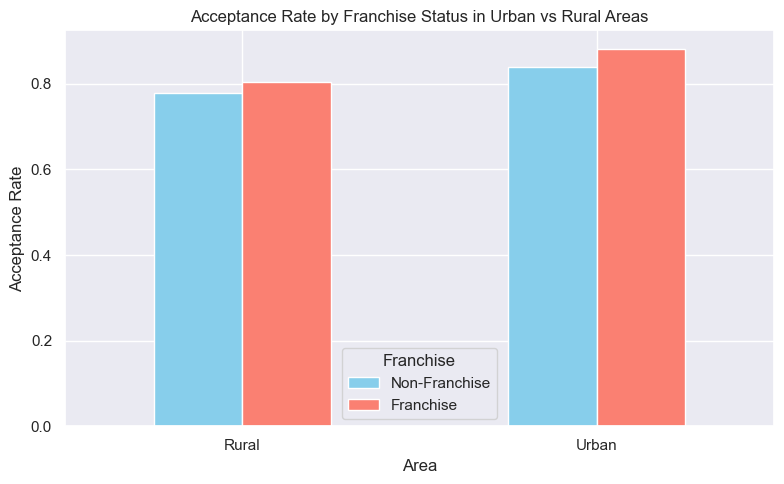

In [24]:
accept_rate = (
    df.groupby(['UrbanRural_Binary', 'Franchise_Binary'])['Accept']
    .mean()
    .unstack() 
)


accept_rate.index = ['Rural', 'Urban']
accept_rate.columns = ['Non-Franchise', 'Franchise']


ax = accept_rate.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 5))

ax.set_title("Acceptance Rate by Franchise Status in Urban vs Rural Areas")
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("Area")
ax.legend(title="Franchise")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Como podemos ver, tiene más posibilidades de que le acepten si va a ser franquiciado para zonas urbanas y rurales.